In [ ]:
!pip install missingno
!pip install seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import plotly

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/output1.xlsx")
df = df.drop(columns='Unnamed: 0')
df.dtypes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
Subgenre        object
dtype: object

Т.к. в третей работе данные никак не изменялись(за исключением добавления нового столбца subgenre) вся визуализация данных из второй работы будет такой же, если повторить ее здесь. Поэтому, просто проверим целостность датасета визуально, и для примера возьмем одну визуализацию из 2 работы и сделаем ее с помощью другой диаграммы:

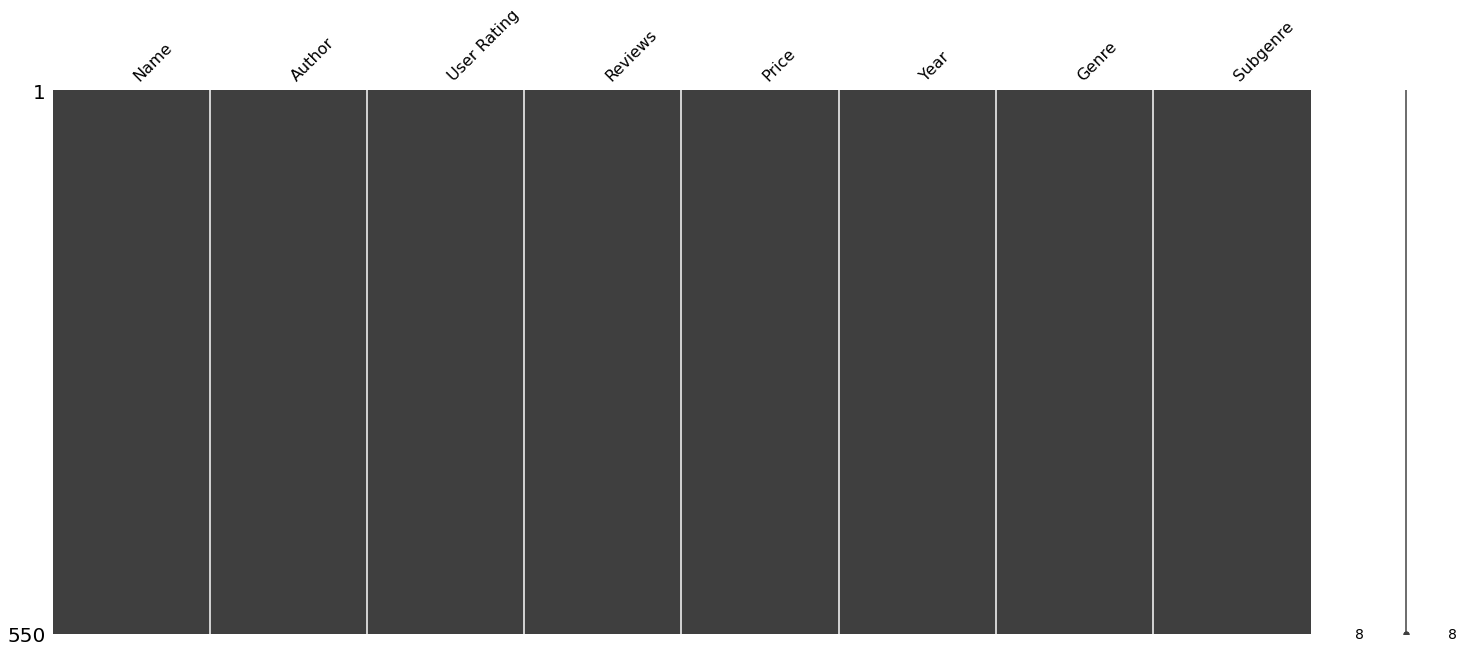

In [ ]:
msno.matrix(df) #проверяем что в каждом столбце одинаковое количесво записей

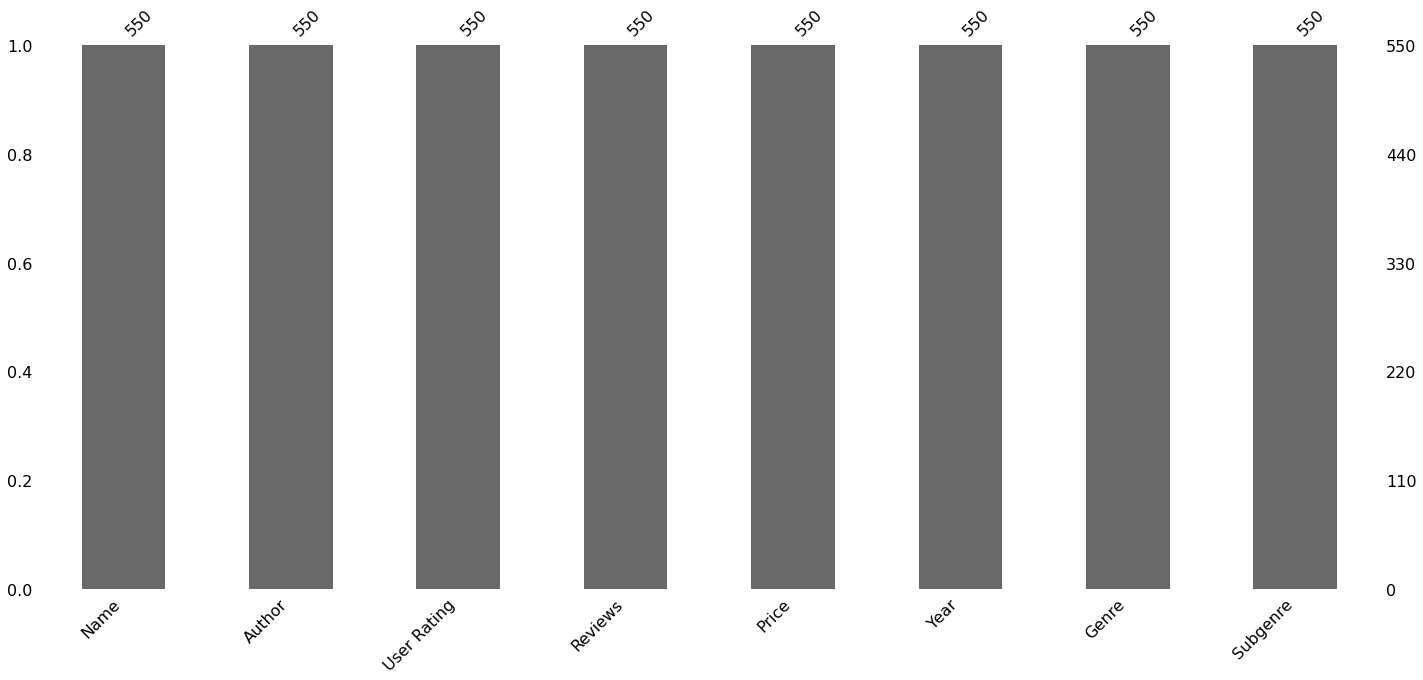

In [ ]:
msno.bar(df)

Попробуем визуализировать данные из второй работы, например посмотрим распределение рейтинга с помощью круговой диаграммы:

In [ ]:
vac = {v: df['User Rating'].tolist().count(v) for v in df['User Rating'].unique()}
labels = list(vac.keys())
values = list(vac.values())
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.show()

Данные аналогичны данным из второй работы:

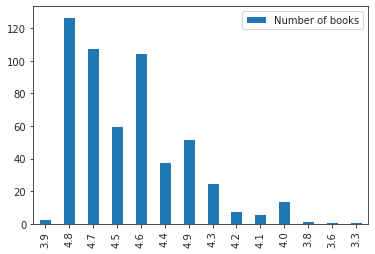

In [ ]:
rating_data = {rating: df["User Rating"].to_list().count(rating) for rating in set(df["User Rating"])}
df_1 = pd.DataFrame.from_dict(data = rating_data, orient = 'index', columns=['Number of books'])
df_1.plot(kind='bar')

Посмотрим как кореллируют между собой числовые данные в таблице:

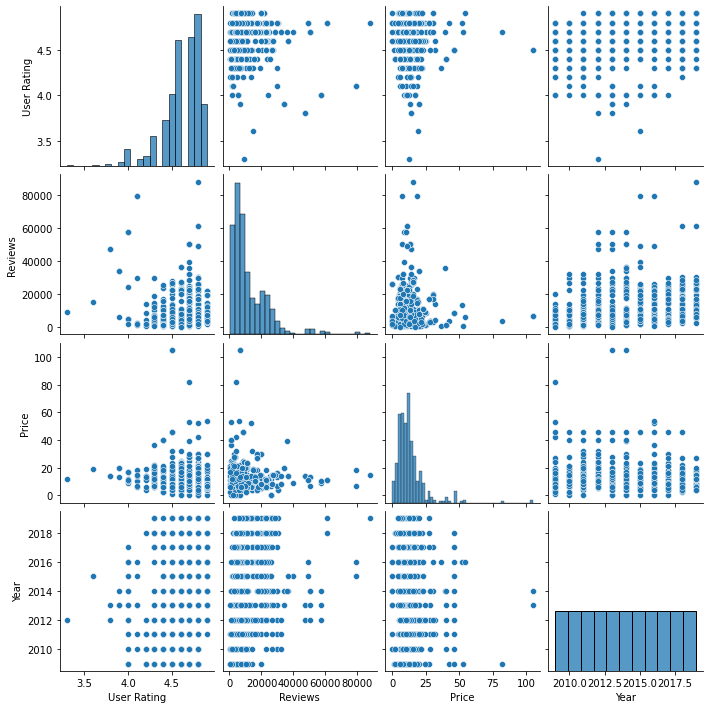

In [ ]:
sns.pairplot(df)
plt.show()

Посмотрим подробнее, как цена зависит от года:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



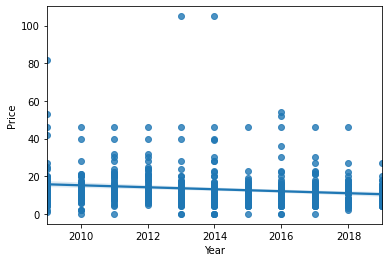

In [ ]:
df2 = df[['Price','Year']]
sns.regplot(df2['Year'], df2['Price'])

Какой-то закономерности нет, распределение цен в каждом году примерно равное. Посмотрим зависимость цен от количества отзывов:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



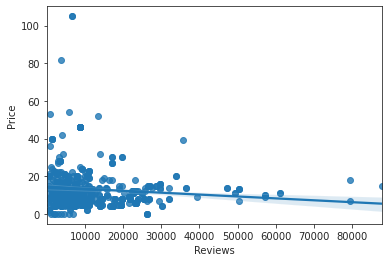

In [ ]:
df2 = df[['Price','Reviews']]
sns.regplot(df2['Reviews'], df2['Price'])

Выглядит так, как будто зависимости нет, просто средняя цена по всем записям находится в пределах от 0 до 20. Проверим это, построив график распределения цен и числа рецензий

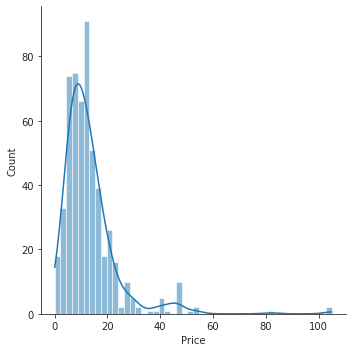

In [ ]:
sns.displot(df2, x="Price", kde=True)

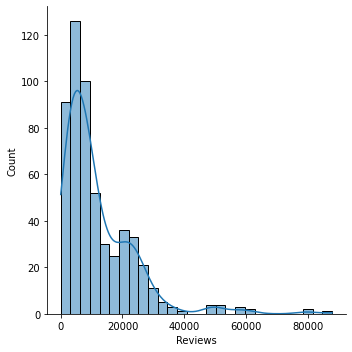

In [ ]:
sns.displot(df, x="Reviews", kde=True)

Видим, что наша догадка поттвердилась, так же можно заметить что цены и число рецензий распределяются по закону Пуассона (возможно гамма распределения). Подтвердим что средние значение цены >10 но <20 а число рецензий >10000 но меньше <20000.
В гипотезе я утверждал что средняя цена будет около 5, в ходе анализа было полученно более точное значение:

In [ ]:
print('Средняя цена', round(df['Price'].mean()))
print('Среднее число рецензий', round(df['Reviews'].mean()))

Средняя цена 13
Среднtt число рецензий 11953


Теперь проанализируем поджанры: проверим гипотезу о том. что средняя цена книг Young Adult Fiction и Non Fiction больше остальных:

               Subgenre  Price
4                Comics  24.00
11                Games  22.00
7               Fantasy  17.15
1           Non Fiction  14.84
10                Drama  13.00
9   Young Adult Fiction  12.95
8              Thriller  12.48
12               Horror  12.00
5            Historical  10.83
0                 Novel  10.54
6       Science fiction  10.38
2                Comedy   8.33
3              Children   7.46


UFuncTypeError: ignored

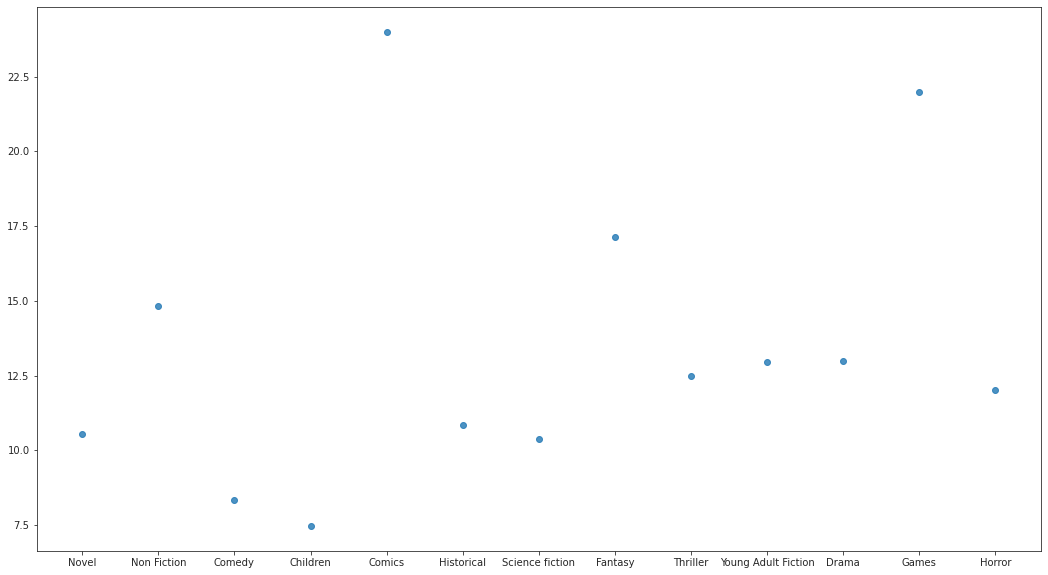

In [ ]:
df_p = df[['Price','Subgenre']]
new = {}
for v in df['Subgenre'].unique():
  p = df_p.loc[df_p['Subgenre'] == v]
  new[v]=round(float(p.mean()),2)

df_p1 = pd.DataFrame.from_dict(data={'Subgenre':new.keys(),'Price':list(new.values())})
print(df_p1.sort_values(by='Price', ascending=False))
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.regplot(x=df_p1['Subgenre'],y=df_p1['Price'], ax=ax)

Вывод: предположение было ошибочно, дороже всего продаются жанры Comics, Games и Fantasyю

Теперь проверим гипотезу о том, что у книг с жанром Children в среднем больше всего рецензий, а у Young Adult меньше всего

               Subgenre   Reviews
8              Thriller  23093.04
5            Historical  22661.00
0                 Novel  20746.60
9   Young Adult Fiction  17058.10
6       Science fiction  16651.00
10                Drama  12159.00
3              Children  12149.78
11                Games  11973.80
7               Fantasy  10754.30
1           Non Fiction   9065.15
2                Comedy   8576.67
4                Comics   6605.50
12               Horror   4748.00


UFuncTypeError: ignored

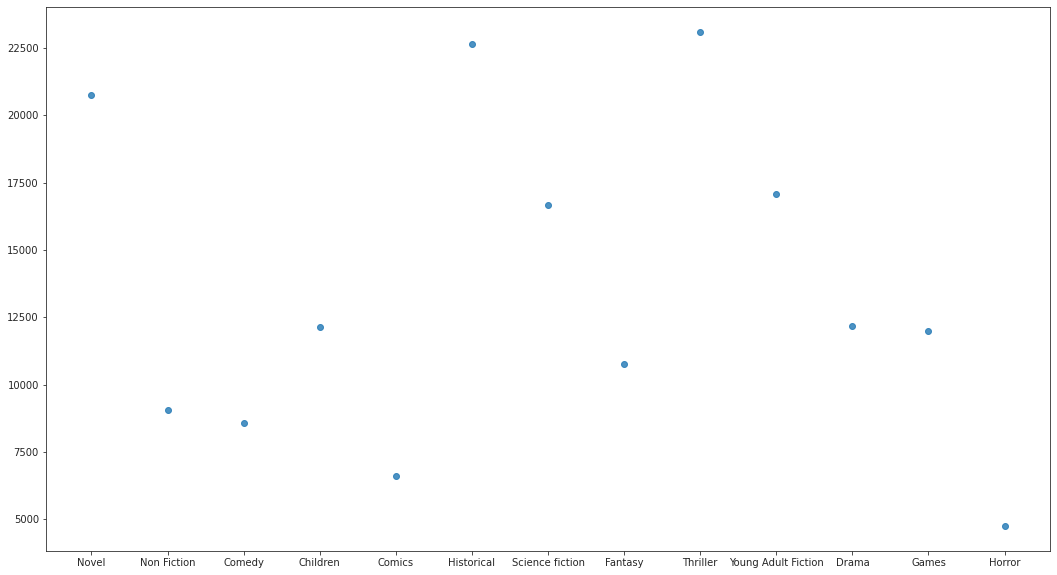

In [ ]:
df_p = df[['Reviews','Subgenre']]
new = {}
for v in df['Subgenre'].unique():
  p = df_p.loc[df_p['Subgenre'] == v]
  new[v]=round(float(p.mean()),2)

df_p1 = pd.DataFrame.from_dict(data={'Subgenre':new.keys(),'Reviews': list(new.values())})
print(df_p1.sort_values(by='Reviews', ascending=False))
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.regplot(x=df_p1['Subgenre'],y=df_p1['Reviews'])

Гипотеза не подтвердилась, мало того интересно заметить что поджанр Thriller имеет максимальное среднее число отзывов, хотя близкий к нему поджанр Horror наоборот минимальное.

Теперь проверим гипотезу о том, что у книг с жанром Children в среднем рейтинг максимальный, а у Young Adult минимальный:

               Subgenre  User Rating
4                Comics         4.85
3              Children         4.81
2                Comedy         4.80
11                Games         4.80
5            Historical         4.70
9   Young Adult Fiction         4.66
1           Non Fiction         4.60
6       Science fiction         4.60
7               Fantasy         4.60
12               Horror         4.50
0                 Novel         4.40
8              Thriller         4.36
10                Drama         4.30


UFuncTypeError: ignored

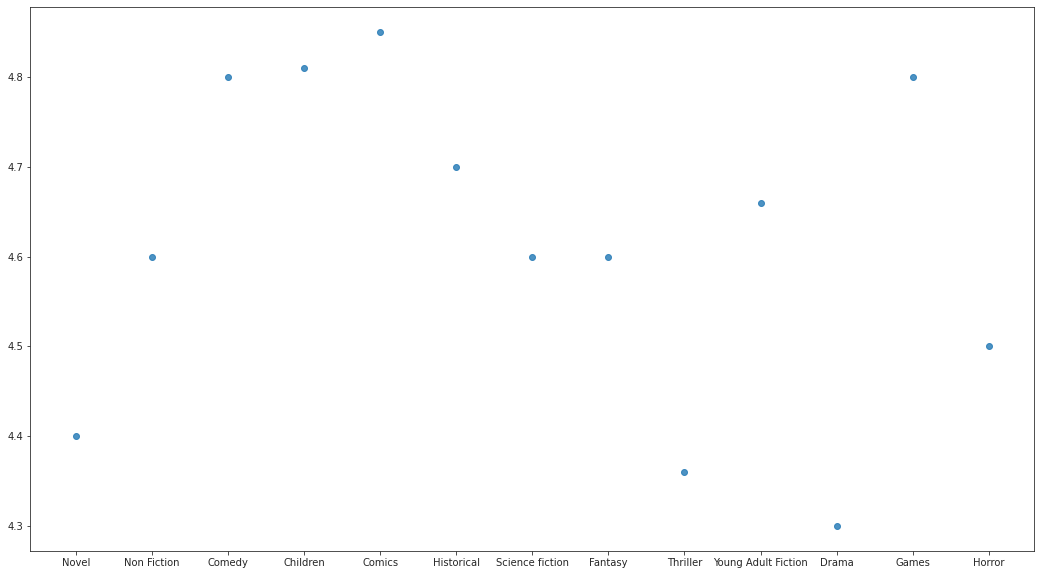

In [ ]:
df_p = df[['User Rating','Subgenre']]
new = {}
for v in df['Subgenre'].unique():
  p = df_p.loc[df_p['Subgenre'] == v]
  new[v]=round(float(p.mean()),2)

df_p1 = pd.DataFrame.from_dict(data={'Subgenre':new.keys(),'User Rating': list(new.values())})
print(df_p1.sort_values(by='User Rating', ascending=False))
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.regplot(x=df_p1['Subgenre'],y=df_p1['User Rating'])

Оказалось, предположение было довольно точным, Children идет на 2 месте сразу поcле Сomics, однако рейтинг Young Adult Fiction не минимальный, а находится где-то посередине.

Теперь посмотрим какой поджанр художественной литературы (не берем Non-Fiction, т.к. из выводов второй работы было известно что разделение Fiction и Non Fiction примерно 50\50) лидирует по общему числу книг в топе, по предположению это будет детская литература.

In [ ]:
import plotly.graph_objects as go
vac = {v: df['Subgenre'].tolist().count(v) for v in df['Subgenre'].unique()}
labels = list(vac.keys())
values = list(vac.values())
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.show()

Гипотеза подтвердилась, Детские книги сотставляют 16% от общего числа книг(56% составляет не художественная литература), что почти на 10% больше второго лидера по числу книг, Young Adult Fiction у которых 7% от общего числа книг.
